# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


filename_features = "../_Dados/UCI HAR Dataset/features.txt"
filename_labels = "../_Dados/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "../_Dados/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "../_Dados/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "../_Dados/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "../_Dados/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "../_Dados/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "../_Dados/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\rodpr\AppData\Local\Temp\ipykernel_2392\2525978091.py:25: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\rodpr\AppData\Local\Temp\ipykernel_2392\2525978091.py:28: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\rodpr\AppData\Local\Temp\ipykernel_2392\2525978091.py:32: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

### 1 - Árvore sem padronizar

In [69]:
%%time
# Treinando o PCA (Principal Component Analysis) com 10 componente (n_components=10) usando os dados de treinamento (X_train).
prcomp = PCA(n_components=10).fit(X_train) 
# Transformando os dados de treinamento (X_train) usando o PCA treinado (rcomp) para obter as principais componentes.
pc_train = prcomp.transform(X_train)
# Transformando os dados de teste (X_test) usando o PCA treinado (rcomp) para obter as principais componentes.
pc_test  = prcomp.transform(X_test)



CPU times: total: 578 ms
Wall time: 1.29 s


In [70]:
#A variância explicada por componente
prcomp.explained_variance_

array([34.82363041,  2.73504627,  2.29439284,  1.04377529,  0.943517  ,
        0.70815225,  0.65505256,  0.59508997,  0.53964563,  0.47764872])

In [71]:
#A variância explicada acumulada por componente 
prcomp.explained_variance_.cumsum()

array([34.82363041, 37.55867667, 39.85306951, 40.89684481, 41.84036181,
       42.54851406, 43.20356662, 43.79865659, 44.33830222, 44.81595094])

In [72]:
#A variância percentual por componente
prcomp.explained_variance_ratio_

array([0.6255444 , 0.04913023, 0.04121467, 0.01874956, 0.0169486 ,
       0.01272069, 0.01176685, 0.01068973, 0.00969377, 0.00858011])

In [73]:
#A variância percentual acumulada por componente
prcomp.explained_variance_ratio_.cumsum()

array([0.6255444 , 0.67467463, 0.7158893 , 0.73463886, 0.75158746,
       0.76430815, 0.77607501, 0.78676474, 0.79645851, 0.80503861])

#### Acurácia da  árvore sem padronização

In [74]:
%%time
#treinando a árvore com a componente principal como variável explicativa
clf = DecisionTreeClassifier(random_state=1234,ccp_alpha=0.001).fit(pc_train, y_train)

train_score = clf.score(pc_train, y_train)
test_score = clf.score(pc_test, y_test)

print(f'Acurácia da árvore na base de treino:    {train_score *100:.1f}')
print(f'Acurácia da árvore na base de teste:     {test_score*100:.1f}')

Acurácia da árvore na base de treino:    89.3
Acurácia da árvore na base de teste:     82.4
CPU times: total: 78.1 ms
Wall time: 177 ms


C:\Users\rodpr\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


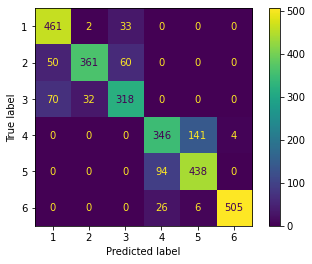

In [77]:
plot_confusion_matrix(clf, pc_test, y_test)

#### Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

Neste caso, com apenas 10  componentes não é possível explicar 90% da variância. Com as 10 componentes chegamos a explicar 80,5% da variância.

Para saber com quantas chegaríamos a 90% teríamos que rodar o PCa para todas as componentes



In [53]:
%%time
prcomp = PCA().fit(X_train) 

CPU times: total: 1.09 s
Wall time: 443 ms


In [54]:
ncomp_criterio3 = (prcomp.explained_variance_ratio_.cumsum()<0.90).sum()+1
print(f'Para explicar 90% da variância seria necessário {ncomp_criterio3} componentes principais')

Para explicar 90% da variância seria necessário 34 componentes principais


### 2 - Árvore padronizada

In [78]:
%%time
#função para padronizar os dados
def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s


CPU times: total: 0 ns
Wall time: 0 ns


In [79]:
# padronizando X_train
X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [80]:
# padronizando X_test
X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)
X_test_pad.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,-0.277661,-0.210595,2.192704,-0.787134,-0.833071,-0.093428,-0.807954,-0.838871,-0.104160,-0.824606,...,-0.253620,-0.166362,-0.344707,0.003565,0.357512,-1.363669,0.575389,-0.404722,0.622618,-0.038342
1,0.198626,0.182560,-0.250221,-0.876836,-0.928903,-0.857905,-0.896993,-0.928791,-0.863122,-0.824606,...,-2.300359,0.490938,0.012254,-0.264048,0.030782,-0.747105,1.870875,-0.361677,0.636623,-0.145684
2,0.024583,-0.318001,-0.228446,-0.921442,-0.933896,-0.906953,-0.916735,-0.933654,-0.912484,-0.910827,...,-0.291514,0.274775,-0.134966,-0.119651,0.445996,0.037913,0.323883,-0.370869,0.632738,-0.126834
3,-0.061047,-0.572940,-0.213673,-0.923681,-0.940657,-0.918926,-0.918996,-0.941439,-0.927619,-0.909586,...,-0.058615,-0.210642,-0.441639,-0.066432,0.338455,0.472614,0.625768,-0.363372,0.645167,-0.117565
4,0.013820,-0.387815,-0.494555,-0.921523,-0.928878,-0.949818,-0.915977,-0.923689,-0.951235,-0.909586,...,-1.090596,-0.810389,-0.796804,-0.022272,-0.098513,1.097162,-0.201965,-0.350197,0.665544,-0.104100


In [86]:
%%time
# Treinando o PCA (Principal Component Analysis) com 10 componente (n_components=10) usando os dados de treinamento padronizados(X_train_pad).
prcomp2 = PCA(n_components=10).fit(X_train_pad) 
# Transformando os dados de treinamento (X_train) usando o PCA treinado (rcomp) para obter as principais componentes.
pc_train2 = prcomp.transform(X_train_pad)
# Transformando os dados de teste padronizados (X_test_pad) usando o PCA treinado (rcomp) para obter as principais componentes.
pc_test2  = prcomp.transform(X_test_pad)



CPU times: total: 484 ms
Wall time: 219 ms


In [87]:
#A variância explicada por componente
prcomp2.explained_variance_

array([284.88237655,  36.9176163 ,  15.74411031,  14.0471749 ,
        10.59327884,   9.67167565,   7.69137261,   6.7267816 ,
         5.58644777,   5.41402309])

In [88]:
#A variância explicada acumulada por componente 
prcomp2.explained_variance_.cumsum()

array([284.88237655, 321.79999285, 337.54410316, 351.59127806,
       362.18455689, 371.85623255, 379.54760516, 386.27438676,
       391.86083453, 397.27485761])

In [89]:
#A variância percentual por componente
prcomp2.explained_variance_ratio_

array([0.50781172, 0.0658068 , 0.02806437, 0.02503953, 0.01888285,
       0.01724006, 0.01371011, 0.0119907 , 0.00995802, 0.00965067])

In [90]:
#A variância percentual acumulada por componente
prcomp2.explained_variance_ratio_.cumsum()

array([0.50781172, 0.57361853, 0.60168289, 0.62672242, 0.64560527,
       0.66284533, 0.67655545, 0.68854614, 0.69850416, 0.70815483])

### Acurácia da  árvore com padronização

In [91]:
%%time
#treinando a árvore com a componente principal como variável explicativa
clf2 = DecisionTreeClassifier(random_state=1234, ccp_alpha = 0.001).fit(pc_train2, y_train)

train_score2 = clf.score(pc_train2, y_train)
test_score2 = clf.score(pc_test2, y_test)

print(f'Acurácia da árvore na base de treino:    {train_score2 *100:.1f}')
print(f'Acurácia da árvore na base de teste:     {test_score2*100:.1f}')

Acurácia da árvore na base de treino:    62.7
Acurácia da árvore na base de teste:     62.2
CPU times: total: 62.5 ms
Wall time: 95.2 ms


C:\Users\rodpr\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


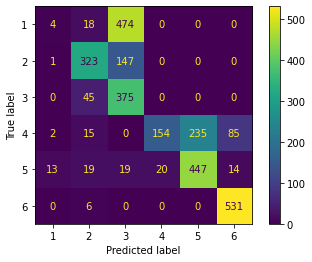

In [94]:
plot_confusion_matrix(clf, pc_test2, y_test)

#### Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

Neste caso, com apenas 10  componentes não é possível explicar 90% da variância. Com as 10 componentes e os dados padronizados, chegamos a explicar 70,8% da variância.

Para saber com quantas chegaríamos a 90% teríamos que rodar o PCA para todas as componentes

In [53]:
%%time
prcomp2_todas = PCA().fit(X_train) 

CPU times: total: 1.09 s
Wall time: 443 ms


In [54]:
ncomp_criterio3 = (prcomp.explained_variance_ratio_.cumsum()<0.90).sum()+1
print(f'Para explicar 90% da variância seria necessário {ncomp_criterio3} componentes principais')

Para explicar 90% da variância seria necessário 34 componentes principais
